In [210]:
import pandas as pd
from datetime import datetime
from tkinter import *
from tkinter.filedialog import askopenfilename
from rich.console import Console
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

console = Console()

In [96]:
output_facial=pd.read_csv("C:/Users/louis/Documents/GitHub/Projet_Wirtz/output.csv")

In [97]:
output_facial

,Unnamed: 0,names,presence
0,0,LA_NEVE_Louis,12-10-2022-17h53
1,1,NEUNREUTHER_Alexander,12-10-2022-17h53


In [98]:
data0 = {'Colonne_0' : [datetime.today().strftime('%d-%m-%Y'),'Intitulé_du_cours_prof','Horaires','signature_de_l_enseignant']}

df0 = pd.DataFrame(data0)

data1 = {'Colonne_0' :['Elève_alternant','NEUNREUTHER_Alexander','LA_NEVE_Louis']}

df1 = pd.DataFrame(data1)

data2 = {'Colonne_0' :['Elève_non_alternant','ROUSSAUX Claude-Marie']}
df2 = pd.DataFrame(data2)

frames = [df0, df1, df2]
df = pd.concat(frames)
df["names"]=df["Colonne_0"]
df=df.drop(["Colonne_0"],axis=1)

df

,names
0,12-10-2022
1,Intitulé_du_cours_prof
2,Horaires
3,signature_de_l_enseignant
0,Elève_alternant
1,NEUNREUTHER_Alexander
2,LA_NEVE_Louis
0,Elève_non_alternant
1,ROUSSAUX Claude-Marie


In [99]:
sousdf1=pd.DataFrame(df["names"][4:])
output_facial=output_facial.drop(["Unnamed: 0"],axis=1)

In [100]:
sousdf1

,names
0,Elève_alternant
1,NEUNREUTHER_Alexander
2,LA_NEVE_Louis
0,Elève_non_alternant
1,ROUSSAUX Claude-Marie


In [101]:
sousdf1=sousdf1.merge(output_facial, on='names', how='left')
sousdf1

,names,presence
0,Elève_alternant,NaN
1,NEUNREUTHER_Alexander,12-10-2022-17h53
2,LA_NEVE_Louis,12-10-2022-17h53
3,Elève_non_alternant,NaN
4,ROUSSAUX Claude-Marie,NaN


In [31]:
from datetime import date


sousdf1.to_csv("C:/Users/louis/Documents/GitHub/Projet_Wirtz/output_modif_"+str(datetime.today().strftime("%Hh%M"))+".csv")

In [102]:
#Suite du merge/merge final
compteur_lancer= int(input("Combien de fois avez vous lancé le programme: "))
compteur_lancer

2

In [103]:
liste_cours=['Travail personnel',
 ' A 330',
 ' UE 1. Architectures, modèles et langages de données',
 ' A 330','']
nbr_cours=int(len(liste_cours)/2)
nbr_cours

2

In [104]:
i=1
noms_fichier_pres=[]
if compteur_lancer==nbr_cours:
    while i <= compteur_lancer:
        root = Tk()
        root.update()
        console.print('Sélectionnez le '+str(i)+'ème fichier de présence', style="#3399FF")
        noms_fichier_pres.append(askopenfilename())
        root.destroy()
        i+=1
else:
    pass

noms_fichier_pres

Sélectionnez le 1ème fichier de présence

Sélectionnez le 2ème fichier de présence

['C:/Users/louis/Documents/GitHub/Projet_Wirtz/output_modif_17h02.csv',
 'C:/Users/louis/Documents/GitHub/Projet_Wirtz/output_modif_17h56.csv']

In [181]:
list_csv_doc=[]
for a in noms_fichier_pres:
    list_csv_doc.append(pd.read_csv(a))

for i in range(0,nbr_cours):
    list_csv_doc[i]=list_csv_doc[i].drop("Unnamed: 0",axis=1)


In [182]:
for i in range(1,nbr_cours):
    df_final=list_csv_doc[0].merge(list_csv_doc[i], on='names', how='left')
df_final

,names,presence_x,presence_y
0,Elève_alternant,NaN,NaN
1,NEUNREUTHER_Alexander,12-10-2022-17h00,12-10-2022-17h53
2,LA_NEVE_Louis,12-10-2022-17h01,12-10-2022-17h53
3,Elève_non_alternant,NaN,NaN
4,ROUSSAUX_Claude-Marie,NaN,NaN


In [199]:
fichier_present=df.merge(df_final, on='names', how='left')
fichier_present

,names,presence_x,presence_y
0,12-10-2022,NaN,NaN
1,Intitulé_du_cours_prof,NaN,NaN
2,Horaires,NaN,NaN
3,signature_de_l_enseignant,NaN,NaN
4,Elève_alternant,NaN,NaN
5,NEUNREUTHER_Alexander,12-10-2022-17h00,12-10-2022-17h53
6,LA_NEVE_Louis,12-10-2022-17h01,12-10-2022-17h53
7,Elève_non_alternant,NaN,NaN
8,ROUSSAUX Claude-Marie,NaN,NaN


In [184]:
liste_info=['Travail personnel',
 ' A 330',
 ' UE 1. Architectures, modèles et langages de données',
 ' A 330',
 '']

liste_info.remove('')

liste_horaire=[['08:00', '09:00'], ['09:00', '12:00']]

In [200]:
p=0
for i in range(1,fichier_present.shape[1]):
    fichier_present.loc[1,fichier_present.columns[i]]=liste_info[p]
    p+=2

p=0
for i in range(1,fichier_present.shape[1]):
    fichier_present.loc[2,fichier_present.columns[i]]=str(liste_horaire[p])
    p+=1

In [201]:
fichier_present=fichier_present.drop(3).reset_index(drop=True)
fichier_present = fichier_present.replace(np.nan, '', regex=True)


,names,presence_x,presence_y
0,12-10-2022,NaN,NaN
1,Intitulé_du_cours_prof,Travail personnel,"UE 1. Architectures, modèles et langages de d..."
2,Horaires,"['08:00', '09:00']","['09:00', '12:00']"
3,Elève_alternant,NaN,NaN
4,NEUNREUTHER_Alexander,12-10-2022-17h00,12-10-2022-17h53
5,LA_NEVE_Louis,12-10-2022-17h01,12-10-2022-17h53
6,Elève_non_alternant,NaN,NaN
7,ROUSSAUX Claude-Marie,NaN,NaN


In [204]:
fichier_present

,names,presence_x,presence_y
0,12-10-2022,,
1,Intitulé_du_cours_prof,Travail personnel,"UE 1. Architectures, modèles et langages de d..."
2,Horaires,"['08:00', '09:00']","['09:00', '12:00']"
3,Elève_alternant,,
4,NEUNREUTHER_Alexander,12-10-2022-17h00,12-10-2022-17h53
5,LA_NEVE_Louis,12-10-2022-17h01,12-10-2022-17h53
6,Elève_non_alternant,,
7,ROUSSAUX Claude-Marie,,


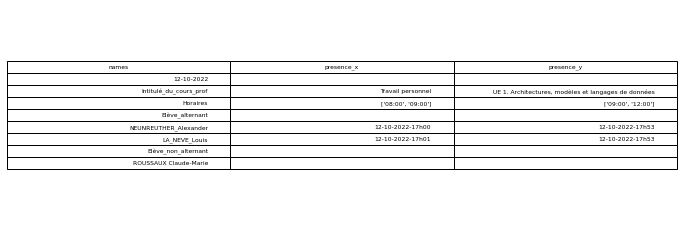

In [212]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=fichier_present.values,colLabels=fichier_present.columns,loc='center')

pp = PdfPages(r"C:\Users\louis\Documents\GitHub\Projet_Wirtz\feuilles_presence\feuille_presence_"+str(datetime.now().strftime("%d-%m-%Y"))+".pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()